# 기본 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True
%precision 6
pd.set_option('display.precision', 6)
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

# 10장 요약

In [2]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing = housing.iloc[:,[7,8]]
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


In [4]:
hv_max = housing['median_house_value'].max()
mask = housing['median_house_value'] >= hv_max
housing = housing[~mask]
housing = housing.reset_index(drop=True)
housing.index.name = 'index'
housing

,median_income,median_house_value
index,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


In [5]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing

,median_income,median_house_value,income_cat
index,,,
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
19670,1.5603,78100.0,2
19671,2.5568,77100.0,2
19672,1.7000,92300.0,2


In [6]:
stratified_count = housing.groupby('income_cat',observed=True).count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


In [7]:
random_sampling = housing.sample(frac=0.1, random_state=42)
random_sampling

,median_income,median_house_value,income_cat
index,,,
14447,1.8357,104200.0,2
13921,4.2109,171200.0,3
12981,4.0481,97300.0,3
2579,3.5380,102700.0,3
12162,2.2000,116500.0,2
...,...,...,...
19377,6.6246,284200.0,5
485,2.9405,289500.0,2
5018,1.6027,97300.0,2


In [8]:
random_sampling_count = random_sampling.groupby('income_cat',observed=True).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,87,87
2,644,644
3,702,702
4,347,347
5,188,188


In [9]:
random_sampling_ratio = random_sampling_count / random_sampling_count.sum()
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.044207,0.044207
2,0.327236,0.327236
3,0.356707,0.356707
4,0.176321,0.176321
5,0.095528,0.095528


In [10]:
stratified_ratio = stratified_count / stratified_count.sum()
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


In [11]:
proportions = pd.concat([stratified_ratio.iloc[:,[1]],
                        random_sampling_ratio.iloc[:,[1]]],
                        axis=1)
proportions.columns = ['전체','무작위']
proportions.index.name = '소득구간'
proportions

,전체,무작위
소득구간,,
1,0.041372,0.044207
2,0.333011,0.327236
3,0.361017,0.356707
4,0.177992,0.176321
5,0.086607,0.095528


# 11.1 확률분포

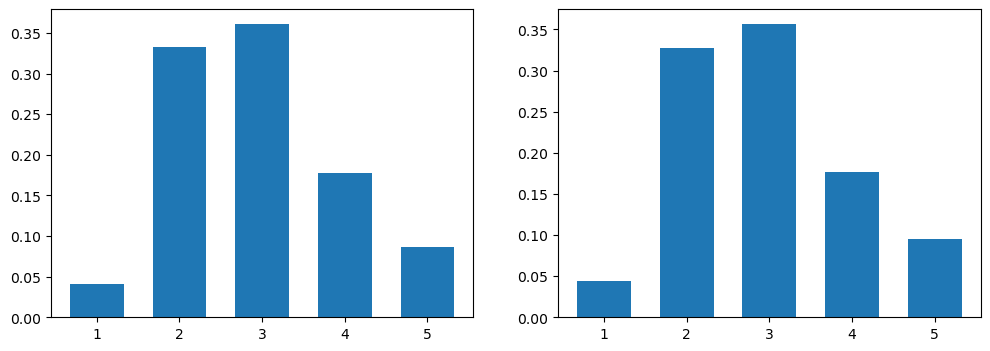

In [47]:
income_cat = housing['income_cat']
income_cat_random = random_sampling['income_cat']

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(income_cat, bins=5, range=(1, 6), density=True, rwidth=0.65)
ax1.set_xticks(np.linspace(1.5,5.5,5))
ax1.set_xticklabels(np.arange(1, 6))

ax2.hist(income_cat_random, bins=5, range=(1, 6), density=True, rwidth=0.65)
ax2.set_xticks(np.linspace(1.5,5.5,5))
ax2.set_xticklabels(np.arange(1, 6))

plt.show()

# 11.2 균등분포

In [48]:
housing.sample(frac=0.1, random_state=42)

,median_income,median_house_value,income_cat
index,,,
14447,1.8357,104200.0,2
13921,4.2109,171200.0,3
12981,4.0481,97300.0,3
2579,3.5380,102700.0,3
12162,2.2000,116500.0,2
...,...,...,...
19377,6.6246,284200.0,5
485,2.9405,289500.0,2
5018,1.6027,97300.0,2


In [50]:
housing_index = housing.index
housing_index

RangeIndex(start=0, stop=19675, step=1, name='index')

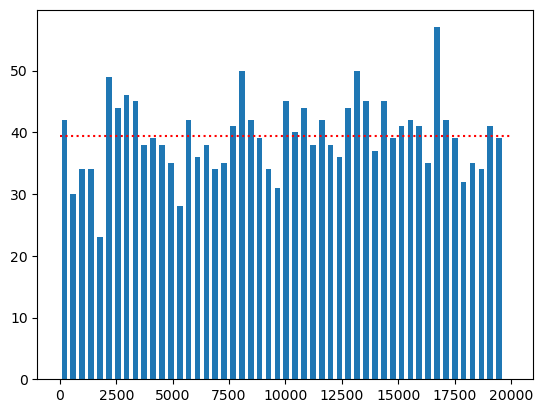

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

freq, _, _ = plt.hist(random_sampling.index, bins=50, range=(0, 19674), rwidth=0.64)
plt.hlines(1968/50, 0, 20000, color='red', linestyles='dotted')

plt.show()

In [56]:
freq

array([42., 30., 34., 34., 23., 49., 44., 46., 45., 38., 39., 38., 35.,
       28., 42., 36., 38., 34., 35., 41., 50., 42., 39., 34., 31., 45.,
       40., 44., 38., 42., 38., 36., 44., 50., 45., 37., 45., 39., 41.,
       42., 41., 35., 57., 42., 39., 32., 35., 34., 41., 39.])

In [57]:
np.mean(freq)

39.360000

In [58]:
freq/1968

array([0.021341, 0.015244, 0.017276, 0.017276, 0.011687, 0.024898,
       0.022358, 0.023374, 0.022866, 0.019309, 0.019817, 0.019309,
       0.017785, 0.014228, 0.021341, 0.018293, 0.019309, 0.017276,
       0.017785, 0.020833, 0.025407, 0.021341, 0.019817, 0.017276,
       0.015752, 0.022866, 0.020325, 0.022358, 0.019309, 0.021341,
       0.019309, 0.018293, 0.022358, 0.025407, 0.022866, 0.018801,
       0.022866, 0.019817, 0.020833, 0.021341, 0.020833, 0.017785,
       0.028963, 0.021341, 0.019817, 0.01626 , 0.017785, 0.017276,
       0.020833, 0.019817])

In [59]:
np.mean(freq/1968)

0.020000

In [61]:
np.random.seed(42)
random_trial = 10000
sample = np.random.choice(range(1,6), random_trial)
sample.shape

(10000,)

In [62]:
freq, _ = np.histogram(sample, bins=5, range=(1,6))
freq

array([2047, 2016, 1943, 1975, 2019], dtype=int64)

In [64]:
income_cat_freq10000 = pd.DataFrame({'도수' : freq, 
                                    '상대도수' : freq/random_trial}, 
                                    index=range(1, 6))
income_cat_freq10000

,도수,상대도수
1,2047,0.2047
2,2016,0.2016
3,1943,0.1943
4,1975,0.1975
5,2019,0.2019


In [65]:
prob_X = proportions['전체'].values
prob_X

array([0.041372, 0.333011, 0.361017, 0.177992, 0.086607])

In [67]:
np.random.seed(42)

random_trial = 10000
sample = np.random.choice(range(1, 6), random_trial, p=prob_X)
sample.shape

(10000,)

In [72]:
freq, _ = np.histogram(sample, bins=5, range=(1, 6))

income_cat_freq10000 = pd.DataFrame({'도수' : freq,
                                    '상대 도수' : freq/random_trial})
income_cat_freq10000

,도수,상대 도수
0,416,0.0416
1,3379,0.3379
2,3655,0.3655
3,1712,0.1712
4,838,0.0838


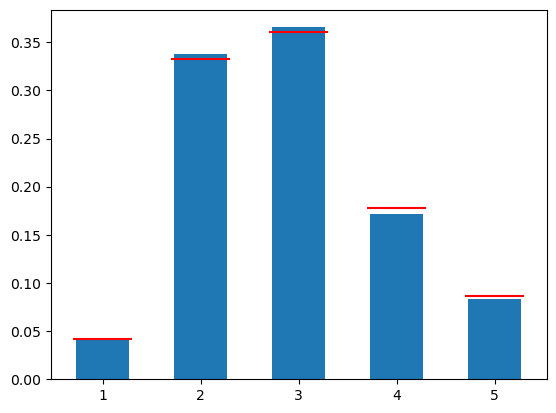

In [91]:
fig = plt.figure()
ax = fig.add_subplot()

ax.hist(sample, bins=5, range=(1,6), density=True, rwidth=0.54)
ax.hlines(prob_X, np.arange(1.2,6), np.arange(1.8,6), colors='red')

ax.set_xticks(np.linspace(1.5, 5.5, 5))
ax.set_xticklabels(range(1,6))

plt.show()